In [2]:
from pyspark.sql import SparkSession


In [4]:
df = spark.read.csv('hdfs:///user/sic2024_tranthuyninh/Capstone/Python/final_data.csv', inferSchema=True, header=True)


In [3]:
spark = SparkSession.builder \
    .appName("HUMAN ACTIVITY") \
    .getOrCreate()


24/08/19 22:16:17 WARN Utils: Your hostname, primary resolves to a loopback address: 127.0.0.1; using 192.168.1.26 instead (on interface enp0s3)
24/08/19 22:16:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/19 22:16:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
num_columns = len(df.columns)


In [6]:
num_columns

563

In [8]:
df.head(5)

24/08/19 22:18:53 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
24/08/19 22:18:57 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Subject, Activity, tBodyAcc-mean()-X, tBodyAcc-mean()-Y, tBodyAcc-mean()-Z, tBodyAcc-std()-X, tBodyAcc-std()-Y, tBodyAcc-std()-Z, tBodyAcc-mad()-X, tBodyAcc-mad()-Y, tBodyAcc-mad()-Z, tBodyAcc-max()-X, tBodyAcc-max()-Y, tBodyAcc-max()-Z, tBodyAcc-min()-X, tBodyAcc-min()-Y, tBodyAcc-min()-Z, tBodyAcc-sma(), tBodyAcc-energy()-X, tBodyAcc-energy()-Y, tBodyAcc-energy()-Z, tBodyAcc-iqr()-X, tBodyAcc-iqr()-Y, tBodyAcc-iqr()-Z, tBodyAcc-entropy()-X, tBodyAcc-entropy()-Y, tBodyAcc-entropy()-Z, tBodyAcc-arCoeff()-X,1, tBodyAcc-arCoeff()-X,2, tBodyAcc-arCoeff()-X,3, tBodyAcc-arCoeff()-X,4, tBodyAcc-arCoeff()-Y,1, tBodyAcc-arCoeff()-Y,2, tBodyAcc-arCoeff()-Y,3, tBodyAcc-arCoeff()-Y,4, tBodyAcc-arCoeff()-Z,1, tBodyAcc-arCoeff()-Z

[Row(Subject=1, Activity='STANDING', tBodyAcc-mean()-X=0.28858451, tBodyAcc-mean()-Y=-0.020294171, tBodyAcc-mean()-Z=-0.13290514, tBodyAcc-std()-X=-0.9952786, tBodyAcc-std()-Y=-0.98311061, tBodyAcc-std()-Z=-0.91352645, tBodyAcc-mad()-X=-0.99511208, tBodyAcc-mad()-Y=-0.98318457, tBodyAcc-mad()-Z=-0.92352702, tBodyAcc-max()-X=-0.93472378, tBodyAcc-max()-Y=-0.56737807, tBodyAcc-max()-Z=-0.74441253, tBodyAcc-min()-X=0.85294738, tBodyAcc-min()-Y=0.68584458, tBodyAcc-min()-Z=0.81426278, tBodyAcc-sma()=-0.96552279, tBodyAcc-energy()-X=-0.99994465, tBodyAcc-energy()-Y=-0.99986303, tBodyAcc-energy()-Z=-0.99461218, tBodyAcc-iqr()-X=-0.99423081, tBodyAcc-iqr()-Y=-0.98761392, tBodyAcc-iqr()-Z=-0.94321999, tBodyAcc-entropy()-X=-0.40774707, tBodyAcc-entropy()-Y=-0.67933751, tBodyAcc-entropy()-Z=-0.60212187, tBodyAcc-arCoeff()-X,1=0.92929351, tBodyAcc-arCoeff()-X,2=-0.85301114, tBodyAcc-arCoeff()-X,3=0.35990976, tBodyAcc-arCoeff()-X,4=-0.058526382, tBodyAcc-arCoeff()-Y,1=0.25689154, tBodyAcc-arCoeff(

In [9]:
df.show(5)

24/08/19 22:19:30 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Subject, Activity, tBodyAcc-mean()-X, tBodyAcc-mean()-Y, tBodyAcc-mean()-Z, tBodyAcc-std()-X, tBodyAcc-std()-Y, tBodyAcc-std()-Z, tBodyAcc-mad()-X, tBodyAcc-mad()-Y, tBodyAcc-mad()-Z, tBodyAcc-max()-X, tBodyAcc-max()-Y, tBodyAcc-max()-Z, tBodyAcc-min()-X, tBodyAcc-min()-Y, tBodyAcc-min()-Z, tBodyAcc-sma(), tBodyAcc-energy()-X, tBodyAcc-energy()-Y, tBodyAcc-energy()-Z, tBodyAcc-iqr()-X, tBodyAcc-iqr()-Y, tBodyAcc-iqr()-Z, tBodyAcc-entropy()-X, tBodyAcc-entropy()-Y, tBodyAcc-entropy()-Z, tBodyAcc-arCoeff()-X,1, tBodyAcc-arCoeff()-X,2, tBodyAcc-arCoeff()-X,3, tBodyAcc-arCoeff()-X,4, tBodyAcc-arCoeff()-Y,1, tBodyAcc-arCoeff()-Y,2, tBodyAcc-arCoeff()-Y,3, tBodyAcc-arCoeff()-Y,4, tBodyAcc-arCoeff()-Z,1, tBodyAcc-arCoeff()-Z,2, tBodyAcc-arCoeff()-Z,3, tBodyAcc-arCoeff()-Z,4, tBodyAcc-correlation()-X,Y, tBodyAcc-correlation()-X,Z, tBodyAcc-correlation()-Y,Z, tGravityAcc-mean()-X, tGravityAcc-mean()-Y, 

+-------+--------+-----------------+-----------------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+--------------+-------------------+-------------------+-------------------+----------------+----------------+----------------+--------------------+--------------------+--------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+--------------------------+--------------------------+--------------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+-------------------+---------------

In [10]:
activity_group = df.groupBy('Activity').count()

In [37]:
activity_count = activity_group.orderBy('count', ascending=False)

In [38]:
activity_count.show()

+------------------+-----+
|          Activity|count|
+------------------+-----+
|            LAYING| 1944|
|          STANDING| 1906|
|           SITTING| 1777|
|           WALKING| 1722|
|  WALKING_UPSTAIRS| 1544|
|WALKING_DOWNSTAIRS| 1406|
+------------------+-----+



In [16]:
import pandas as pd

In [39]:
count_activity = pd.DataFrame(activity_count.rdd.map(lambda l: l.asDict()).collect())

In [40]:
count_activity.head(10)

,Activity,count
0,LAYING,1944
1,STANDING,1906
2,SITTING,1777
3,WALKING,1722
4,WALKING_UPSTAIRS,1544
5,WALKING_DOWNSTAIRS,1406


In [42]:
print(count_activity.columns)


Index(['Activity', 'count'], dtype='object')


In [43]:
print(count_activity.head())


           Activity  count
0            LAYING   1944
1          STANDING   1906
2           SITTING   1777
3           WALKING   1722
4  WALKING_UPSTAIRS   1544


In [50]:
import pyspark

In [51]:
import pandas as pd

In [52]:
data = activity_group.collect()


[Stage 24:>                                                         (0 + 1) / 1]



In [53]:
count_activity = pd.DataFrame([row.asDict() for row in data])

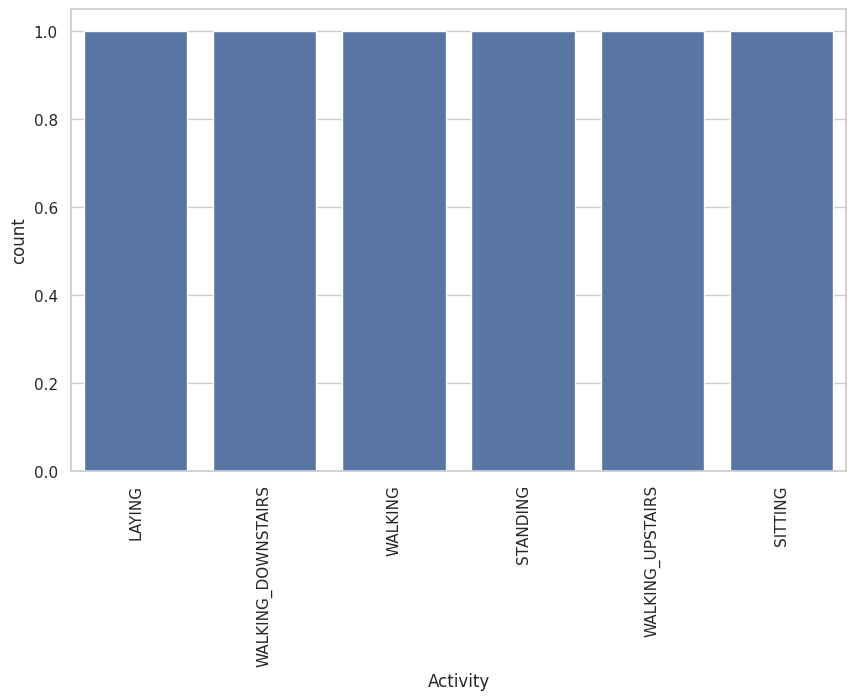

In [60]:
plt.figure(figsize=(10,6))
axis=sns.countplot(x="Activity",data=count_activity)
plt.xticks(x=df['Activity'],rotation='vertical')
plt.show()

In [61]:
print(count_activity.head())


             Activity  count
0              LAYING   1944
1  WALKING_DOWNSTAIRS   1406
2             WALKING   1722
3            STANDING   1906
4    WALKING_UPSTAIRS   1544


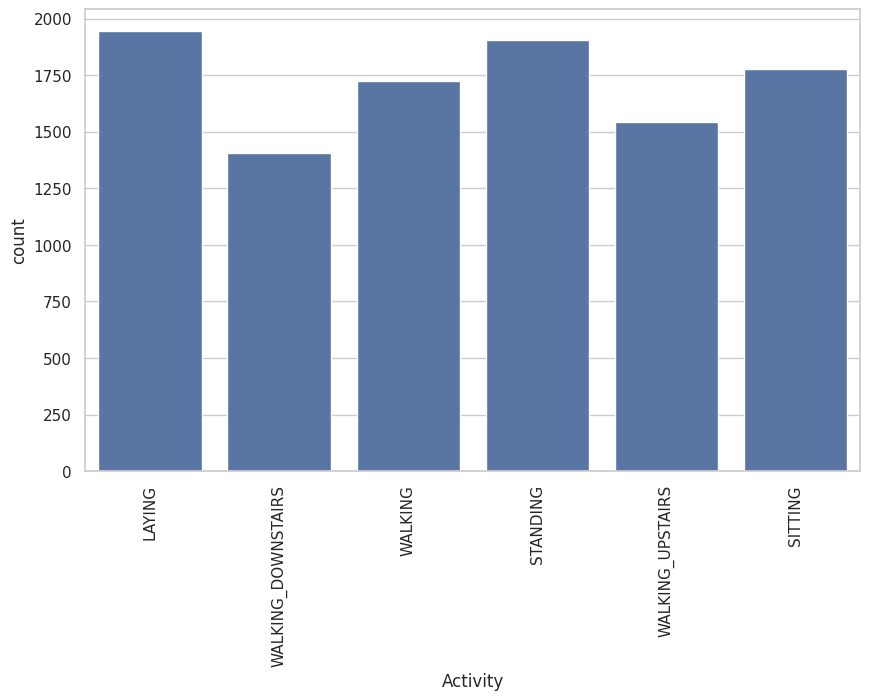

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
axis = sns.barplot(x="Activity", y="count", data=count_activity)
plt.xticks(rotation='vertical')
plt.show()


In [64]:
df.columns

['Subject',
 'Activity',
 'tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityA

In [65]:
df.printSchema()

root
 |-- Subject: integer (nullable = true)
 |-- Activity: string (nullable = true)
 |-- tBodyAcc-mean()-X: double (nullable = true)
 |-- tBodyAcc-mean()-Y: double (nullable = true)
 |-- tBodyAcc-mean()-Z: double (nullable = true)
 |-- tBodyAcc-std()-X: double (nullable = true)
 |-- tBodyAcc-std()-Y: double (nullable = true)
 |-- tBodyAcc-std()-Z: double (nullable = true)
 |-- tBodyAcc-mad()-X: double (nullable = true)
 |-- tBodyAcc-mad()-Y: double (nullable = true)
 |-- tBodyAcc-mad()-Z: double (nullable = true)
 |-- tBodyAcc-max()-X: double (nullable = true)
 |-- tBodyAcc-max()-Y: double (nullable = true)
 |-- tBodyAcc-max()-Z: double (nullable = true)
 |-- tBodyAcc-min()-X: double (nullable = true)
 |-- tBodyAcc-min()-Y: double (nullable = true)
 |-- tBodyAcc-min()-Z: double (nullable = true)
 |-- tBodyAcc-sma(): double (nullable = true)
 |-- tBodyAcc-energy()-X: double (nullable = true)
 |-- tBodyAcc-energy()-Y: double (nullable = true)
 |-- tBodyAcc-energy()-Z: double (nullable =